The dataset has the following structure
* `data/`
    * `body_models/`
        * `SMPLX_NEUTRAL.npz`
    * `poses/`
        * `{dataset}_{pid}_{seqid}.npz`
    * `scenes/`
        * `{dataset}_scene/`
            * `{object_name}.json`
            * `{object_name}.npy`



100%|██████████| 319/319 [00:05<00:00, 54.19it/s]


(-8.0, 5.0, -7.0, 6.0)

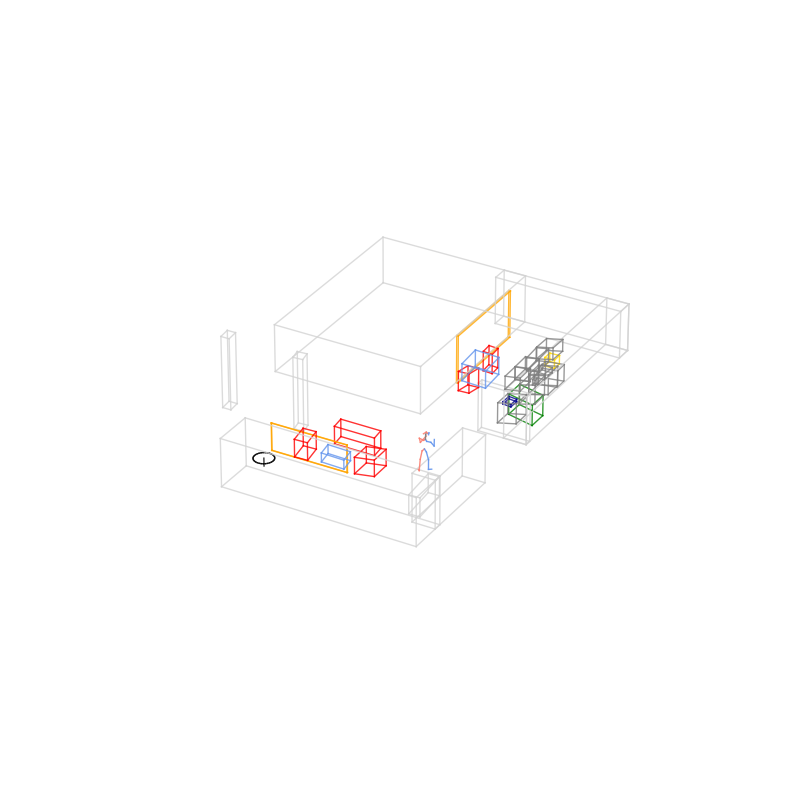

In [1]:
import matplotlib.pylab as plt
import numpy as np

from hik.data.kitchen import Kitchen
from hik.data import PersonSequences
from hik.vis import plot_pose
from networkx.classes import nodes

dataset = "A"
# load geometry
kitchen = Kitchen.load_for_dataset(
    dataset=dataset,
    data_location="data/scenes"
)

# load poses
person_seqs = PersonSequences(
    person_path="data/poses"
)

smplx_path = "data/body_models"

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

dataset = "C"  # ["A", "B", "C", "D"]
frame = 5

kitchen.plot(ax, frame)
for person in person_seqs.get_frame(dataset, frame):
    plot_pose(ax, person["pose3d"], linewidth=1)
ax.axis('off')


(-8.0, 5.0, -7.0, 6.0)

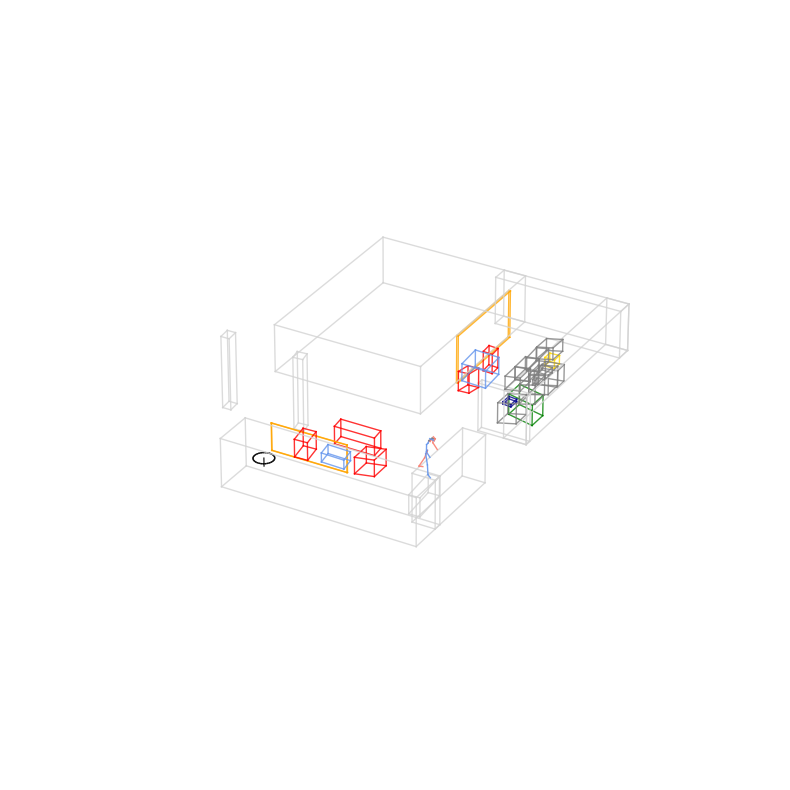

In [2]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

dataset = "C"  # ["A", "B", "C", "D"]
frame = 30

kitchen.plot(ax, frame)
for person in person_seqs.get_frame(dataset, frame):
    plot_pose(ax, person["pose3d"], linewidth=1)
ax.axis('off')


In [3]:
person["pose3d"]

array([[ 0.40047923, -2.6118445 ,  0.92741126],
       [ 0.36204794, -2.5612454 ,  0.8333104 ],
       [ 0.38632447, -2.6805255 ,  0.8242213 ],
       [ 0.37703264, -2.6160822 ,  1.0401174 ],
       [ 0.24542555, -2.4912663 ,  0.46732274],
       [ 0.5072034 , -2.7970595 ,  0.49165002],
       [ 0.40616006, -2.6145246 ,  1.1724234 ],
       [ 0.09158501, -2.5281048 ,  0.08369833],
       [ 0.5131627 , -2.7764406 ,  0.07206005],
       [ 0.4445165 , -2.6287966 ,  1.2183568 ],
       [ 0.150819  , -2.4197426 ,  0.01257694],
       [ 0.62864286, -2.85089   ,  0.0419547 ],
       [ 0.46942955, -2.656716  ,  1.3850641 ],
       [ 0.466019  , -2.5898933 ,  1.3060894 ],
       [ 0.45976827, -2.6847908 ,  1.2986643 ],
       [ 0.56351244, -2.6480129 ,  1.5218502 ],
       [ 0.47812977, -2.4624262 ,  1.3515494 ],
       [ 0.48038912, -2.79818   ,  1.3270826 ],
       [ 0.4380473 , -2.3810222 ,  1.0955622 ],
       [ 0.49201447, -2.8269343 ,  1.049587  ],
       [ 0.57801396, -2.3902793 ,  0.878

In [4]:
import pandas as pd




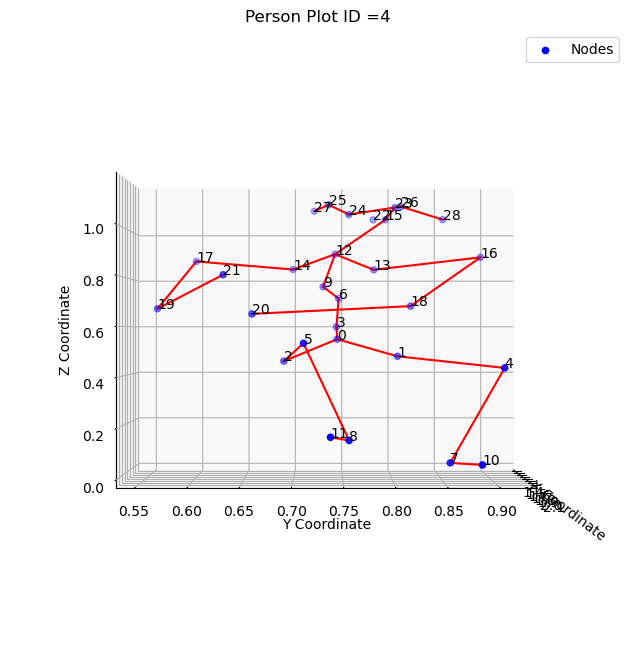

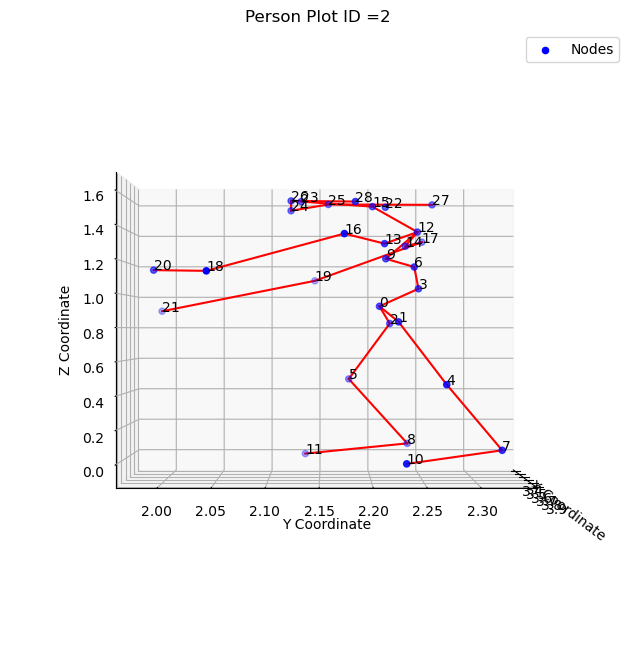

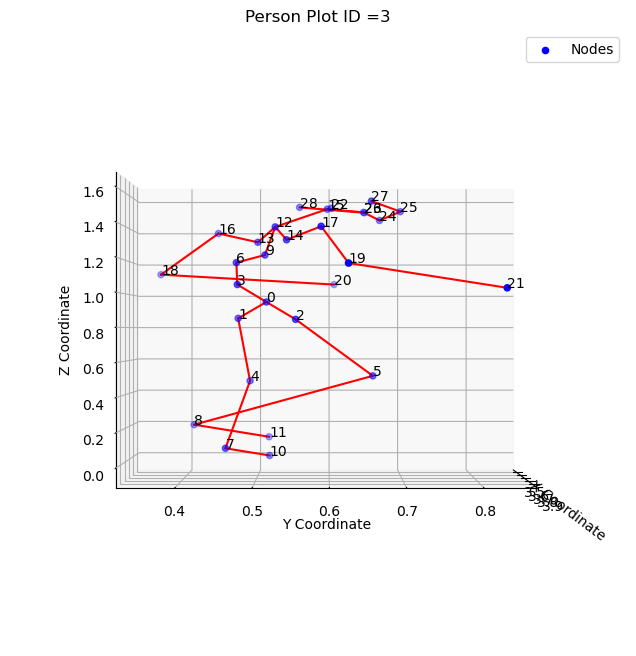

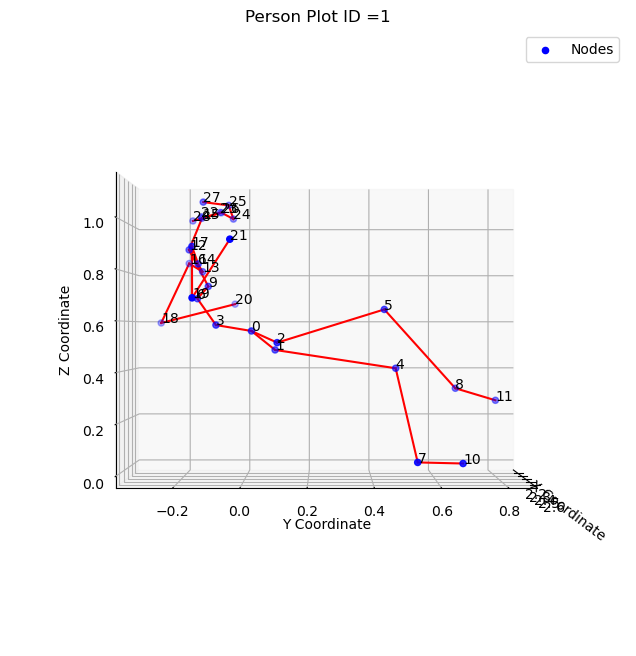

In [8]:
for person in person_seqs.get_frame(dataset, 3000):

    nodes_data = person["pose3d"]
    # Define edges (pairs of node indices)
    edges = [
        (1, 0),
        (0, 2),
        (0, 3),
        (3,6),
        (6,9),
        (9,12),
        (1, 4),
        (4, 7),
        (7, 10),
        (2, 5),
        (5, 8),
        (8, 11),
        (16, 18),
        (18, 20),
        (17, 19),
        (19, 21),
        (16, 13),
        (17, 14),
        (13, 12),
        (14, 12),
        (12, 15),
        (15, 23),
        (24, 25),
        (24, 26),
        (25, 27),
        (26, 28),
    ]


    # Convert to DataFrame
    nodes_df = pd.DataFrame(nodes_data, columns=[ "x", "y", "z"])
    nodes_df['Node'] = range(len(nodes_df))

    # Plotting
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot nodes
    ax.scatter(nodes_df['x'], nodes_df['y'], nodes_df['z'], c='b', label='Nodes')

    # Annotate nodes with indices
    for _, row in nodes_df.iterrows():
        ax.text(row['x'], row['y'], row['z'], f"{int(row['Node'])}", color='black')

    # Plot edges
    for edge in edges:
        start_node = nodes_df.iloc[edge[0]]
        end_node = nodes_df.iloc[edge[1]]
        ax.plot(
            [start_node['x'], end_node['x']],
            [start_node['y'], end_node['y']],
            [start_node['z'], end_node['z']],
            c='r'
        )

    # Labels and legend
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_zlabel('Z Coordinate')
    ax.set_title('Person Plot ID =' + str(person["pid"]))
    ax.legend()

    # Set front view
    ax.view_init(elev=0, azim=0)

    # Show plot
    plt.show()
